In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()
#split it in features and labels
X = iris.data
y = iris.target

In [3]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [6]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
data = pd.read_csv('car.data')
print(data.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [8]:
X = data[[
    'buying',
    'maint',
    'safety'
]].values
y = data[['class']]
print(X, y)

[['vhigh' 'vhigh' 'low']
 ['vhigh' 'vhigh' 'med']
 ['vhigh' 'vhigh' 'high']
 ...
 ['low' 'low' 'low']
 ['low' 'low' 'med']
 ['low' 'low' 'high']]       class
0     unacc
1     unacc
2     unacc
3     unacc
4     unacc
...     ...
1723   good
1724  vgood
1725  unacc
1726   good
1727  vgood

[1728 rows x 1 columns]


In [9]:
#converting the data
#X
Le = LabelEncoder()
for i in range(len(X[0])):
    X[:, i] = Le.fit_transform(X[:, i])
print(X)

[[3 3 1]
 [3 3 2]
 [3 3 0]
 ...
 [1 1 1]
 [1 1 2]
 [1 1 0]]


In [10]:
#converting the data
#y
label_maping = {
    'unacc':0,
    'acc':1,
    'good':2,
    'vgood':3
}
y['class'] = y['class'].map(label_maping)
y = np.array(y)
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


C:\Users\vaibh\AppData\Local\Temp\ipykernel_23084\73932179.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map(label_maping)


In [11]:
#create model
knn = neighbors.KNeighborsClassifier(n_neighbors=20,weights='uniform')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction)

print("predictions: ", prediction)
print("accuracy: ",accuracy)

predictions:  [0 1 0 0 0 0 0 1 3 3 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 1 1 3 0 1 1 0 1
 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 2 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0
 0 0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 2 1 0 0 0 0 0 0 0 0 0 1 2 1 0 3 0 0 0 1 3 0 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 3 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 3 0 0 0 0 0 1 0 0 1 0 0 2 0 0 0 1 0 3 0 0 3 0 0 0 3 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 3 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 1 1 0 1 0 0 1 1 0 1 0]
accuracy:  0.7601156069364162


c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [12]:
print("actual value: ",y[20])
print("predicted value: ",knn.predict(X)[20])

actual value:  [0]
predicted value:  0


In [13]:
a = 1727
print("actual value: ",y[a])
print("predicted value: ",knn.predict(X)[a])

actual value:  [3]


predicted value:  0


In [14]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [15]:
iris = datasets.load_iris()
#split it in features and labels
X = iris.data
y = iris.target

In [16]:
classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

In [17]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [20]:
model = svm.SVC()
model.fit(X_train, y_train)
print(model)

SVC()


In [21]:
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)

In [22]:
print("predictions: ", predictions)
print("actual: ",y_test)
print("accuracy: ",acc)

predictions:  [0 2 1 2 1 0 1 2 0 1 0 2 0 2 0 0 0 1 1 1 0 1 0 0 1 2 1 2 0 2]
actual:  [0 2 1 2 1 0 1 2 0 1 0 2 0 2 0 0 0 1 2 1 0 1 0 0 1 2 1 2 0 2]
accuracy:  0.9666666666666667


In [23]:
for i in range(len(predictions)):
    print(classes[predictions[i]])

Iris Setosa
Iris Virginica
Iris Versicolour
Iris Virginica
Iris Versicolour
Iris Setosa
Iris Versicolour
Iris Virginica
Iris Setosa
Iris Versicolour
Iris Setosa
Iris Virginica
Iris Setosa
Iris Virginica
Iris Setosa
Iris Setosa
Iris Setosa
Iris Versicolour
Iris Versicolour
Iris Versicolour
Iris Setosa
Iris Versicolour
Iris Setosa
Iris Setosa
Iris Versicolour
Iris Virginica
Iris Versicolour
Iris Virginica
Iris Setosa
Iris Virginica


In [24]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd

In [25]:
class Bunch(dict):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.__dict__ = self


url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_df = pd.read_csv(url)

# Assuming the last column is the target
boston = Bunch(
    data=boston_df.iloc[:, :-1].values,
    target=boston_df.iloc[:, -1].values,
    feature_names=boston_df.columns[:-1].tolist(),
    target_names=boston_df.columns[-1],
    DESCR="Boston Housing dataset",
)

# print(boston.data)
# print(boston.target)
# print(boston.feature_names)
# print(boston.target_names)

In [26]:
#features / labels
X = boston.data
y = boston.target

print("X")
print(X)
print(X.shape)
print("y")
print(y)
print(y.shape)

X
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)
y
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5

In [27]:
#algorithm
l_reg = linear_model.LinearRegression()

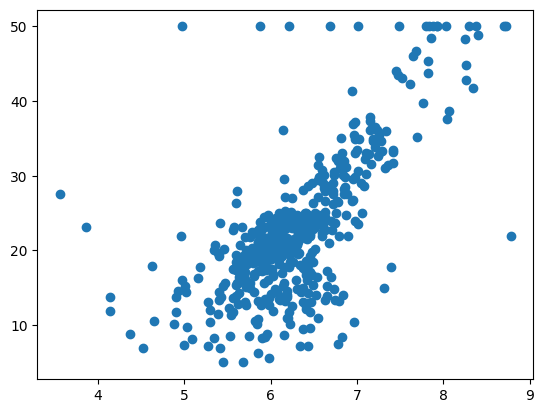

In [28]:
plt.scatter(X.T[5],y)
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [30]:
#train
model = l_reg.fit(X_train, y_train)
predictions = model.predict(X_test)

In [31]:
print("Predictions: ", predictions)
print("R^2 value: ", l_reg.score(X, y)) #the coefficient of determination, indicating the goodness of fit of the model (best fit).  # y = mx + b  # the closer the points the points are to the line the greater will be the value 
print("coedd: ", l_reg.coef_) #  the coefficients (weights) assigned to each feature in the linear regression equation.
print("intercept: ", l_reg.intercept_) # the intercept term (constant) in the linear regression equation.

Predictions:  [15.74130907 24.42139813 22.61476562 36.3254043  37.63647853 20.7912904
 20.37527218 19.21905873 25.57103628 21.22111275 25.15740341 35.99208921
 25.74780611 26.64473985 17.52050602 22.95174934 19.23486306 28.61149872
 14.85113595 16.05983675 18.51397829 29.0355757  12.28349693 20.52733787
 25.49393786 13.11538918 35.15865242 34.86161574 22.54846767  6.68013252
 30.97577743 18.14159043 30.30092437 11.49816283 18.64811804 20.46058791
  8.67889605 29.70100577 15.73160734 21.43079752 41.26811571 20.62862063
 21.10728219 16.61607921 27.58880851  1.35134717 29.61576373 24.34763723
 24.11577654 31.8152339  23.09407493 20.23538289 32.28250302 34.82595088
 21.6266895  30.4774635  30.42025161 20.84990246 24.25864826 19.73321157
 19.39464772 20.5551689  20.93166531 35.871271   26.82972821 13.91393487
 21.76767894 22.21153734 15.87574997 35.765038   18.67719641 22.44700696
 23.44762821 29.59201674 30.84003144 21.4049652  20.72187909 19.35533332
 24.85976314 30.38709798  8.38941806 3

> **linear regression - y = mx + b**

> **logistic regression - logit(y) = 1/(1+e^-y)**

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import pandas as pd

In [36]:
bc = load_breast_cancer()
print(bc)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [37]:
x = bc.data
print(x)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [38]:
x = scale(bc.data)
print(x)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [39]:
y = bc.target

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [54]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(x_train)

KMeans(n_clusters=2, random_state=0)

In [55]:
predictions = model.predict(x_test)

In [56]:
labels = model.labels_

In [57]:
print("labels: ",labels)
print("predictions: ",predictions)
print("accuracy: ",accuracy_score(y_test,predictions))
print("actual: ",y_test)

labels:  [0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0
 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1
 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0
 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0
 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1
 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1]
predictions:  [1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 

In [58]:
print(pd.crosstab(y_train, labels))

col_0    0    1
row_0          
0      148   26
1       16  265


In [68]:
from PIL import Image
import mnist 
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [69]:
# traning
x_train = mnist.train_images()
y_train = mnist.train_labels()

In [70]:
x_test = mnist.test_images()
y_test = mnist.test_labels()

In [72]:
print("x_train: ", x_train)
print("x_test: ", x_test)
print("y_train: ", y_train)
print("y_test: ", y_test)

x_train:  [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
x_test:  [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 

In [73]:
print(x_train.ndim)

3


In [74]:
print(x_train.shape)

(60000, 28, 28)


In [77]:
print(x_test.shape)

(10000, 28, 28)


In [78]:
x_train = x_train.reshape((-1, 28*28))
print(x_train.shape)

(60000, 784)


In [79]:
x_test = x_test.reshape((-1, 28*28))
print(x_test.shape)

(10000, 784)


In [80]:
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [81]:
x_train = x_train/256
x_test = x_test/256

In [82]:
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [83]:
clf = MLPClassifier(solver='adam',activation='relu',hidden_layer_sizes=(64,64))

In [84]:
clf.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(64, 64))

In [93]:
prediction = clf.predict(x_test)

In [94]:
acc = confusion_matrix(y_test, prediction)

In [95]:
print(prediction)

[7 2 1 ... 4 5 6]


In [96]:
print(acc)

[[ 969    0    0    1    0    1    4    1    4    0]
 [   0 1122    3    3    0    1    2    1    3    0]
 [   4    2 1008    3    2    0    2    6    3    2]
 [   0    0    3  985    1    6    0    5    2    8]
 [   2    2    4    1  957    0    4    1    1   10]
 [   3    1    0   12    2  865    1    0    5    3]
 [   4    2    2    1    4    4  939    0    2    0]
 [   1    2    6    3    1    1    0 1000    5    9]
 [   1    1    3    6    4    3    4    5  944    3]
 [   2    4    0    3    5    3    0    5    3  984]]


In [99]:
def accuracy(cm):
    diagonal = cm.trace()
    elements = cm.sum()
    return diagonal/elements

In [100]:
print(accuracy(acc))

0.9773


In [101]:
img = Image.open('five.png')

In [103]:
data = list(img.getdata())
print(data)

[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 255, 255, 

In [104]:
for i in range(len(data)):
    data[i] = 255 - data[i]
print(data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0

In [105]:
five = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [106]:
five = np.array(five)/256

In [107]:
print(five)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [108]:
p = clf.predict([five])

In [109]:
print(p)

[5]


In [116]:
img = Image.open('8.png')
data = list(img.getdata())
print(data)
for i in range(len(data)):
    data[i] = 255 - data[i]
print(data)

[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 255, 255, 255, 255, 255, 255, 2

In [117]:
x = data
x = np.array(x)/256
p = clf.predict([x])
print(p)

[3]
